Домашнее задание к лекции "Визуализация данных"
Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;
данные о видео из трендов YouTube;
данные об уровне счастья в разных странах.
Дополнительная часть (необязательная)
построить дополнительно не менее 2 визуализаций (итого не менее 6);
в работе должны присутствовать следующие визуализации: 

boxplot, 
heatmap, 
scatter plot matrix;

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [48]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

In [71]:
df = pd.read_csv("C:\\Users\\Мария\\Desktop\\2019.csv")
df


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


Немного конкретики про Perceptions of corruption.
Индекс представляет собой оценку от 0 (максимальный уровень коррупции) до 100 (отсутствие коррупции).

<AxesSubplot:title={'center':'Топ 15 стран по социальной поддержке на душу населения'}, ylabel='Country or region'>

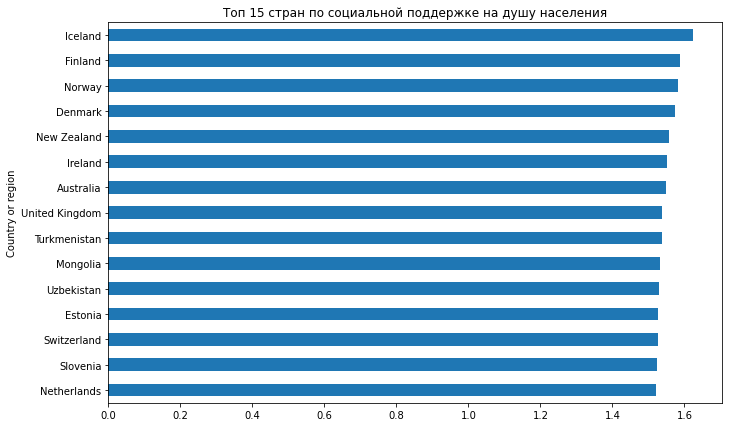

In [62]:
df.groupby('Country or region')['Social support']\
    .mean().nlargest(15).sort_values().plot(kind='barh',
                                           title='Топ 15 стран по социальной поддержке на душу населения')

Text(0.5, 1.0, 'Корреляция между продолжительностью жизни и уровнем счастья')

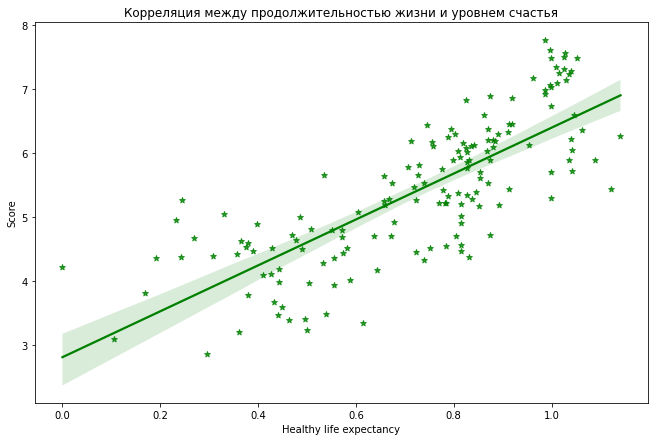

In [87]:
sns.regplot(data=df, x='Healthy life expectancy', y='Score', color='green', marker='*')
plt.title('Корреляция между продолжительностью жизни и уровнем счастья')



    Ярковыраженная взаимосвязь. Чем выше уровень жизни, тем дольше живут жители региона

Text(0.5, 1.0, 'Корреляция между щедростью среди населени и ВВП на душу населения')

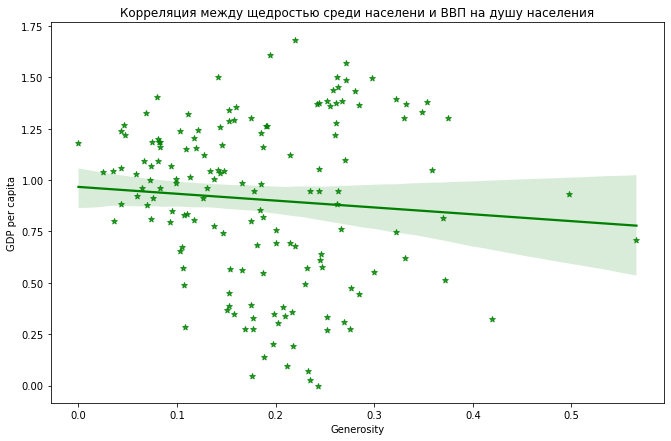

In [85]:
sns.regplot(data=df, x='Generosity', y='GDP per capita', color='green', marker='*')
plt.title('Корреляция между щедростью среди населени и ВВП на душу населения')

Удивительно, но чем выше ввп на душу населения, тем менее они щедрые

Text(0.5, 1.0, 'Корреляция между уровнем коррупции и индексом счастья')

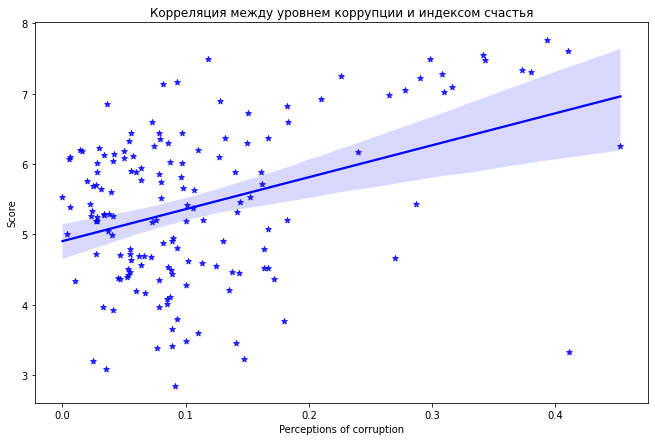

In [58]:
#Построим Диаграмму рассеивания для выявления связи между Уровнем корупции и индексом счастья в стране
sns.regplot(data=df, x='Perceptions of corruption', y='Score', color='blue', marker='*')
plt.title('Корреляция между уровнем коррупции и индексом счастья')

Text(0.5, 1.0, 'Распределение индекса счастья')

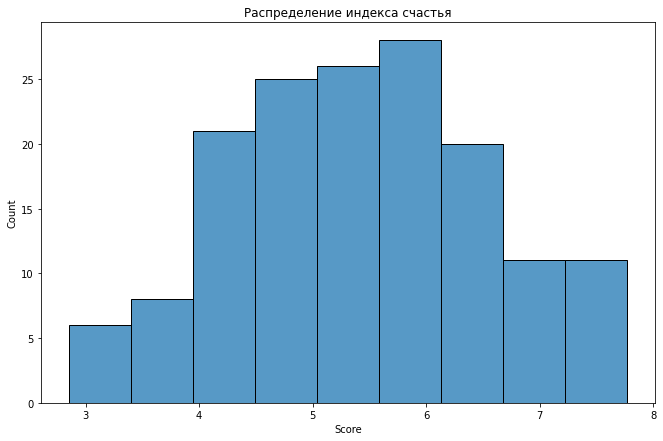

In [53]:
sns.histplot(df['Score'])
plt.title('Распределение индекса счастья') #---Распределение индекса счастья можно считать нормальным

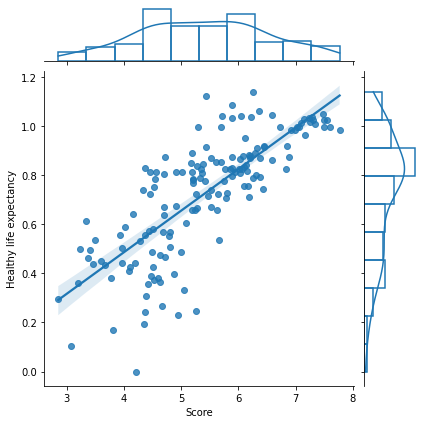

In [54]:
sns.jointplot(x='Score', y='Healthy life expectancy', data=df, kind='reg', marginal_kws=dict(bins=10, fill=False))

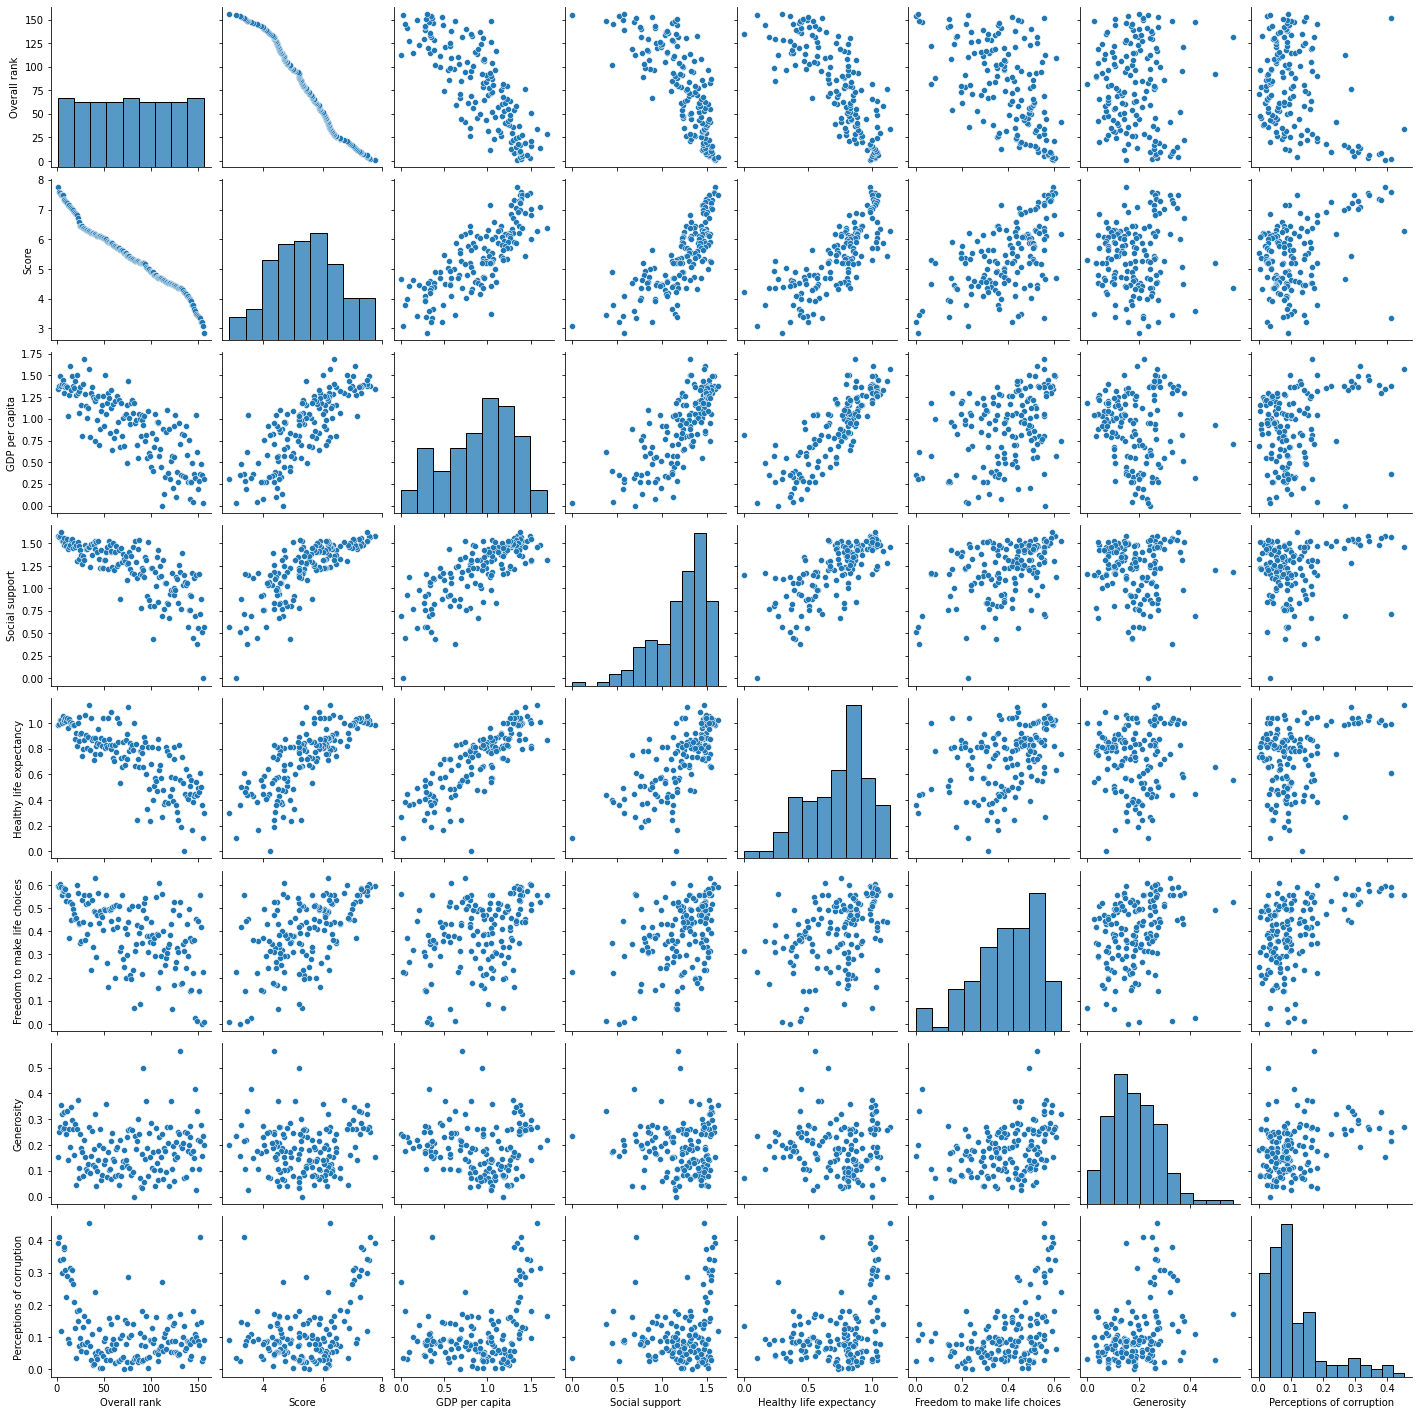

In [57]:
sns.pairplot(df)

Изучив данную диаграму можно заметить, что почти все индексы напярмую связаны с уровнем счастья

Text(0.5, 1.0, 'Корреляция между уровнем коррупции и Свободой делать выбор')

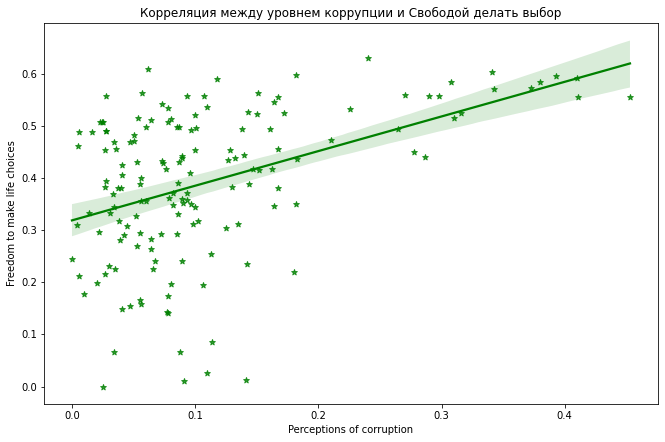

In [82]:
#Построим Диаграмму рассеивания для выявления связи между Уровнем корупции и Свободой делать выбор в стране
sns.regplot(data=df, x='Perceptions of corruption', y='Freedom to make life choices', color='green', marker='*')
plt.title('Корреляция между уровнем коррупции и Свободой делать выбор')

Из данной диаграммы видим прямую взаимосвязь между Восприятием коррупции и Свободой делать выбор.


<AxesSubplot:title={'center':'Вырви Глаз'}, xlabel='Место в рейтинге от 1 до 155', ylabel='Численное Значение'>

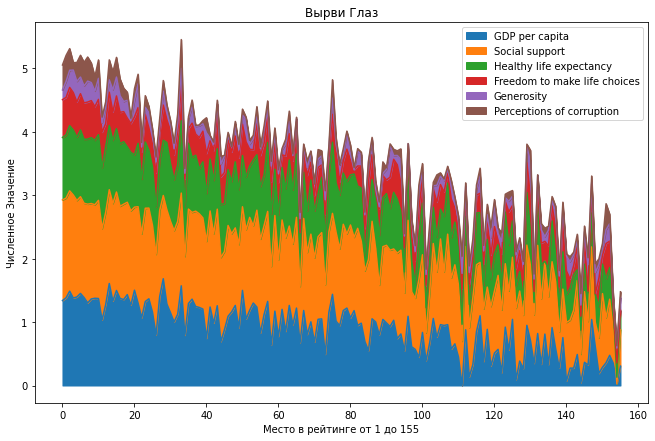

In [81]:
#Постороим диаграмму Area chart
dt = pd.read_csv("C:\\Users\\Мария\\Desktop\\2019.csv")

dt.pop('Country or region')
dt.pop('Overall rank')
dt.drop('Score', axis=1).plot(kind='area',
                             title='Вырви Глаз', 
                             xlabel='Место в рейтинге от 1 до 155', 
                                stacked=True,
                             ylabel='Численное Значение')

Из ужасной диагрымы мы можем уидеть, что в принципе все показатели уменьшаются чем ниже уровень счастья в стране(регионе)

<AxesSubplot:title={'center':'2019'}>

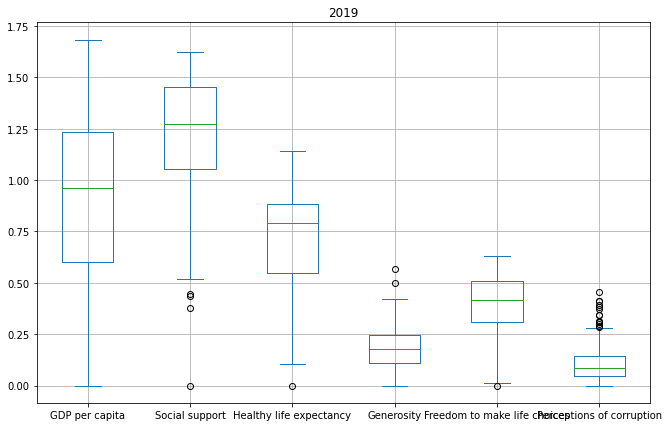

In [93]:
#Построим графики boxplot для всех показателей
df[[ 'GDP per capita','Social support', 'Healthy life expectancy','Generosity',
    'Freedom to make life choices',  'Perceptions of corruption' ]].plot(kind='box',
                                        title='2019', grid=True)